# Principal Component Analysis (PCA)

In one of the previous tutorial, we looked at line fitting using linear regression. Here, we were predicting $\mathbf{y_i}$ from $\mathbf{x_i}$ to minimize the following error:

\begin{equation}
\sum_{i=1}^\mathbf{N} (\mathbf{y_i - f(w, x_i)})^2
\end{equation}

In a related sense, we can interpret PCA performing dimensionality reduction from three different view points:

1.   Minimizing Orthogonal distance between input data points and decision boundaries.
2.   Maximizing variance along the new dimensions.
3.   A representation/compression from which one can reconstruct the original data with minimal error.

PCA make three important assumptions:

1.  Linearity
2.  Principal components (or eigenvectors) are orthogonal
3.  PCs with large variances contain more information and small variances are considered as noise. 

## Minimizing Orthogonal distance

To get an intuitive understanding of this viewpoint, consider a point and a line in 2D space as shown below.

![Figure 1](https://drive.google.com/uc?export=view&id=12DbR_EycUv4-IkrIIyzXGMLjOwU1ttMa)

One can find the orthogonal distance, $\mathbf{d}_{\perp}$, between the point and the line by using Pythagoras theorem and principle of vector projection. The equation defined for Figure 1 is as follows:

\begin{equation}
point^{\top}point = line^{\top}point + \mathbf{d}_{\perp}
\end{equation}

But why do we need to minimize orthogonal distance? Note that when we minimize the orthogonal distance to the least value i.e. 0, the line passes through the point. Turns out that this line is the best fit line for this point.

We can generalize this idea by considering a set of points in 2D where $\mathbf{x = (x_1, x_2, x_3,...., x_N)_i}$. Note that $\mathbf{x_i = [x^1, x^2]^{\top}}$ and $\mathbf{p}$ is one of the possibilities for a line in a linear subspace.

![Figure 2](https://drive.google.com/uc?export=view&id=1BzPIPumXahUE5dBtKZtKYTMdPgGajivk)

In Figure 2, between the 2D points and the given line, the average orthogonal distance $= 1.402$.

Similarly, let's analyze Figure 3. 

![Figure 3](https://drive.google.com/uc?export=view&id=1SJgS9CZhUBO4It5feZrz2YiTUciE4fdG)

Here, the given line is the best fit line achieved through numpy's linear regression. Hence, the average orthogonal distance $= 0.127$.

Among the possible set of lines in linear subspace, the average orthogonal distance calculated for Figure 2 is the maximum. Why? Because the given line in Figure 2 is perpendicular to the best fit line mentioned in Figure 3.

By using our understanding about minimizing orthogonal distance from the example above, we can now understand how PCA uses the above equation to perform dimensionality reduction (1st viewpoint).

Before we proceed, it would be good to know dimensions of $\mathbf{X}$ and $\mathbf{w}$. 

$dim(\mathbf{X}) \in (\mathbf{n, m})$

$dim(\mathbf{w}) \in (\mathbf{n, r})$

where, 

*   $\mathbf{n}:$ Number of dimensions in $\mathbf{X}$
*   $\mathbf{m}:$ Number of examples in $\mathbf{X}$
*   $\mathbf{r}:$ Number of dimensions to retain after performing PCA such that $\mathbf{r \leq n}$
*   $\mathbf{X}:$ Input data matrix
*   $\mathbf{w}:$ Set of eigen vectors

Let us assume that we have an input $\mathbf{X}$ where each of its dimensions has been centered.

We would like to minimize the orthogonal distance, $\mathbf{d}_{\perp}$, between a set of points and a line.

\begin{equation} 
\min_{\mathbf{w}} \mathbf{d_{\perp}^2(X, w)}
\end{equation}

which is nothing but,

\begin{equation}
\min_{\mathbf{w}} \mathbf{X^{\top}X - (w^{\top}X)^2}
\end{equation}

Since $\mathbf{X^{\top}X}$ doesn't contain any $w$ term, a compact notation of the above equation is as follows:

\begin{equation}
\max_{\mathbf{w}} \mathbf{w^{\top} (X^{\top}X) w}
\end{equation}

We see that this is an unconstrained optimization where $\mathbf{w}$ can lead to infinity. Intuitively, as $\mathbf{w\to\infty}$, so will $\mathbf{d}_{\perp} \to\infty$. To prevent this, we add a lagrangian constraint defined as $\lambda(\mathbf{w^{\top}w - 1})$. This makes $\mathbf{w^{\top}w} = 1$, leading to orthogonality of w and maximizing our objective.

From the lecture notes, our final optimization problem defined with lagrangian constraint looks as follows:

\begin{equation*}
\mathbf{(X^{\top}X)w} = \lambda \mathbf{w}
\end{equation*}

Here, $\mathbf{w}$ and $\lambda$ is a series of eigen vectors and eigen values, respectively, of the covariance matrix $\Sigma = \mathbf{X^{\top}X}$.

At this point, we can make an important conclusion:

*   In an n-dimensional input space, the line that minimizes the orthogonal distance has a direction of the first eigen vector of the covariance matrix.

## Maximizing Variance

From this viewpoint, we will see how PCA performs dimensionality reduction by retaining maximum variance along new orthogonal axes.

Here, the data $\mathbf{X}$ is projected onto a set of new orthogonal axes $\mathbf{u}$ to obtain a new representation $\mathbf{Z}$. Note that the new orthogonal axes generated by PCA, $\mathbf{u}$, is a linear combination of existing features or dimensions.

Let's assume that $\mathbf{X}$ is mean-centered. Our objective function for obtaining maximum variance alone new axes is,

\begin{equation}
\operatorname*{argmax} \frac{1}{\mathbf{N}} \mathbf{u^{\top}\Sigma u}
\end{equation}

With the constraint of $\|\mathbf{u}\| = 1$, the first principal component, i.e. the eigen vector corresponding to the largest eigen value of the covariance matrix $\Sigma$, maximizes the variance.

We will see this from an example below.

## Implementation

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
import seaborn as sns; sns.set();
from sklearn.datasets import load_wine
from mpl_toolkits.mplot3d import Axes3D

sns.set();

np.random.seed(7)

#### Create synthetic dataset

In [2]:
np.dot(np.random.rand(2, 2), np.random.randn(2, 50))

array([[ 0.08161472,  0.22808699, -0.16344483, -0.24120879, -1.11922292,
         0.25732607,  0.00373859,  0.97633315, -0.33537387, -1.49990425,
        -0.03912967,  1.30555741, -0.31756267, -0.80491045, -0.8885857 ,
        -0.8094747 , -0.21318317, -1.03677668,  1.29399896, -0.20865545,
         0.05519492,  1.27654506,  1.16900303, -0.27661325,  0.22799068,
         0.39864363, -0.07033394, -1.41848608,  0.45395429,  0.77936053,
         0.19806754, -0.67943213, -0.31041735, -0.51128073, -0.32564238,
         1.12302599,  1.32772062,  0.49695483,  0.49213155,  0.51398121,
         0.03379992, -0.11645907, -0.65574898, -0.18116345,  1.7918105 ,
         0.84929024, -0.24626516, -0.40809615, -0.5283291 ,  0.31008657],
       [ 0.08777262,  0.3613901 , -0.44164143, -0.22298979, -1.03853645,
        -0.40637975,  0.37758393,  1.12642021, -0.54102115, -1.45440056,
         0.14946309,  1.11497499, -0.38381671, -1.2808949 , -0.62038906,
        -0.70534007, -0.09685395, -1.5229184 ,  1.

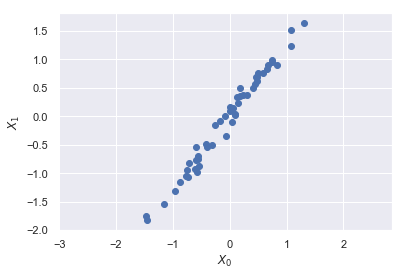

In [3]:
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 50)).T

# Calculating mean of 'X' across every dimension
X_mean = np.mean(X, axis=0)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.axis('equal');

In [4]:
print(X)
X.shape , X_mean.shape

[[-0.57495381 -0.97551204]
 [ 0.47130812  0.6200865 ]
 [ 1.07835311  1.2347863 ]
 [ 0.4610291   0.68935788]
 [-0.59876453 -0.77576521]
 [ 0.30390724  0.37294453]
 [ 1.30589187  1.63399992]
 [-0.73392442 -1.07528208]
 [-0.00257764  0.16349414]
 [ 0.68039833  0.90107316]
 [-0.39545954 -0.54112348]
 [ 0.23898271  0.38327964]
 [-0.76084259 -0.94755363]
 [-0.0753136  -0.33907824]
 [-0.55718614 -0.70532458]
 [-0.07900269  0.00702493]
 [ 0.09046165  0.03683745]
 [ 0.57775496  0.76848138]
 [-0.55751955 -0.74836692]
 [ 0.09960758  0.02976142]
 [ 0.66197742  0.83461659]
 [ 0.40352886  0.50005661]
 [-0.54543002 -0.87271954]
 [ 0.44595757  0.56842548]
 [-0.41326357 -0.4788158 ]
 [ 0.14036459  0.24004554]
 [ 0.05611115  0.14688412]
 [ 0.74793504  0.98934086]
 [-0.17454744 -0.09156731]
 [-1.47629115 -1.76074252]
 [-0.76772747 -1.05660122]
 [ 0.1208276   0.34535907]
 [-0.58589299 -0.53296942]
 [ 0.73783704  0.95344996]
 [-0.00214208  0.0933517 ]
 [-0.31943876 -0.50183678]
 [ 0.50328217  0.7566989 ]
 

((50, 2), (2,))

#### Implementing PCA

Before we dive in, let us walkthrough the pseudo code for the PCA algorithm.

1.   Center the data by subtracting the mean $\mathbf{\mu}$.
2.   Compute the covariance matrix $\mathbf{\Sigma = \frac{1}{N} X^{\top} X}$.
3.   Compute eigen values and eigenvectors of $\Sigma$.
4.   Take the $k$ eigen vectors corresponding to the largest $k$ eigen values. Keep the eigen vectors as the rows and create a matrix $U$ of $k \times d$.

In [5]:
# Centering our data (Step 1)
# X_input = X 
# X_mean = np.mean(X_input, axis=0)
# print(X_mean.shape)
# X_mean = X_mean.reshape(1, -1)
# print(X_mean.shape)
# X_input -= X_mean


In [6]:
# print(X_input.shape)
# num_examples = (X_input.shape)[0]
# constant = 1/(num_examples - 1)
# print(num_examples , constant )

In [7]:
def pca_transform(X_input, num_components):

    """ PCA algorithm as per our pseudo code above.

    Parameters:
    --------------

    X_input: ndarray (num_examples (rows) x num_features(columns))
    Our input data on which we would like to perform PCA.

    num_components: int
    Defines the kth number of principal components (or eigenvectors) to keep
    while performing PCA. These components will be chosen in decreasing 
    order of variances (or eigenvalues).

    """

    # Centering our data (Step 1)
    X_mean = np.mean(X_input, axis=0)
    X_mean = X_mean.reshape(1, -1)
    X_input -= X_mean

    num_examples = (X_input.shape)[0]
    constant = 1/(num_examples - 1)

    # Calculating covariance matrix (Step 2)
    cov_matrix = constant * np.dot(X_input.T, X_input)
    cov_matrix = np.array(cov_matrix, dtype=float)

    # Calculating eigen values and eigen vectors (or first n-principal components)
    # Step 3
    eigvals, eigvecs = np.linalg.eig(cov_matrix)

    # Step 4
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx][:num_components]
    eigvecs = np.atleast_1d(eigvecs[:, idx])[:, :num_components]

    X_projected = np.dot(X_input, eigvecs)
    eigvecs = eigvecs.T
    return X_projected, eigvecs, eigvals

#### Applying PCA to the data

In [8]:
# Perform PCA on input data X
max_components = np.shape(X)[1]
X_projected, principal_components, variances = pca_transform(X, max_components)

print("PCA components: ", principal_components)
print("PCA variance: ", variances)

PCA components:  [[-0.60671702 -0.79491789]
 [-0.79491789  0.60671702]]
PCA variance:  [1.1492571  0.00499659]


Here, PCA components are the eigen vectors of the covariance matrix $\Sigma = \mathbf{X^{\top}X}$. PCA variances are the eigen values or the squared-length describing the importance of each principal component. Here, we see that $\lambda_{\mathbf{w_1}} > \lambda_{\mathbf{w_2}}$.

#### Visualize the principle components

In [9]:
def draw_vector(v0, v1, eigvec, ax=None):
    ax = plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    ax.text(v1[0], v1[1], eigvec)

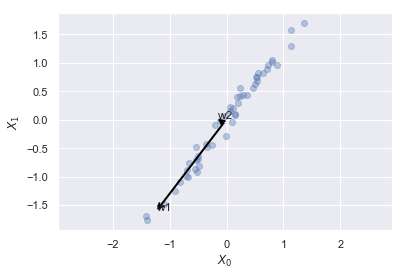

In [10]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.35)
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')

i = 1
for length, vector in zip(variances, principal_components):
    v = vector * 1.8 * np.sqrt(length)
    draw_vector(X_mean, X_mean + v, "w"+str(i))
    i += 1
plt.axis('equal');

From the above figure, we can see that $\mathbf{w_1}$, the first eigen vector (or principal component), maximizes the variance by capturing the most information of the input data along its axis.

Another way to see the effect of first component maximizing variance is to visualize the reconstructed input data $\mathbf{X}$ with only the first principal component.

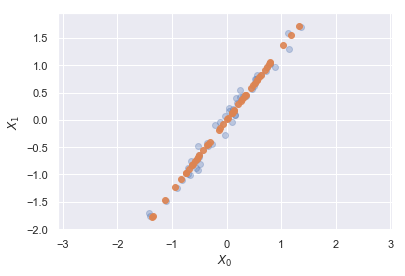

In [11]:
# Perform PCA on input data X and getting only the first eigen vector with maximum variance
num_components = 1
# Projecting in the new space with principal components as axes
X_new = np.dot(X_projected[:, :num_components], principal_components[:num_components, :])

# Projecting the 2D data into a single dimension
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.axis('equal');

## Minimizing Reconstruction Loss

While computing PCA, we transform the input data into a new feature space. This generates a series of orthogonal principal components and variances are generated from a covariance matrix $\Sigma$, where each variance describe the importance of its respective principal component.

In this viewpoint, we posit that we only need the first k of n total principal components. These k components contribute to certain fraction of the total variance which is defined as follows:

\begin{equation}
\frac{\sum_{\mathbf{i=k+1}}^\mathbf{d} \lambda_{i}} {\sum_{\mathbf{i=1}}^\mathbf{d} \lambda_{i}}
\end{equation}

For instance, after computing PCA for a 10-dimensional input dataspace, we get 10 orthogonal principal components. However, out of these 10 components, 6 of them might explain 97% of the variance in the dataset. This means we can discard the remaining 4 components. Although we might slightly lose accuracy, such a dimensionality reduction can make downstream computations efficient.

From the example below, we will see how we can perform dimensionality reduction using PCA.

In [12]:
from sklearn.datasets import load_wine

wine = load_wine()
print("Dataset(X) shape: ", wine.data.shape)
print("Target(y) shape: ", wine.target.shape)
print("Feature names: ", wine.feature_names)
print("Target names: ", wine.target_names)

Dataset(X) shape:  (178, 13)
Target(y) shape:  (178,)
Feature names:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names:  ['class_0' 'class_1' 'class_2']


In [13]:
# Perform PCA on input data 'wine.data'
max_components =  (wine.data.shape)[1]
X_projected, principal_components, variances = pca_transform(wine.data, max_components)

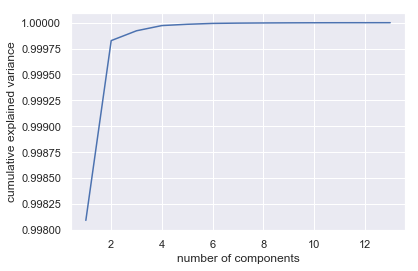

In [14]:
total_var = np.sum(variances)
explained_variance_ratio = variances/total_var

plt.plot(range(1, 14),np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

From the above graph, we can see that the first four components capture almost 99% of the information from the input dataset. This means that we can discard the remaining 9 dimensions and still reconstruct our dataset with lesser dimensions and considerably minimum error.

In [15]:
# project all 13 input dimensions to 4 new axes
num_components = 4
# Projecting in the new space with principal components as axes
X_new = np.dot(X_projected[:, :num_components], principal_components[:num_components, :])

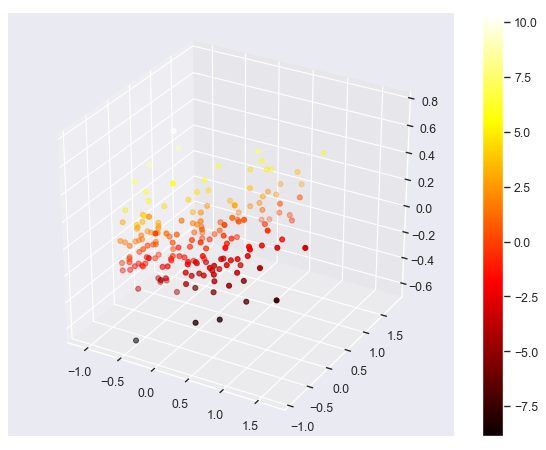

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

x = X_new[:, 0]
y = X_new[:, 1]
z = X_new[:, 2]
c = X_new[:, 3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()